In [1]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
import os, pres_style

In [44]:
idir = os.path.expandvars("$master/notebooks/data/AgeGridResampling/")

bc03_step2_5Z = genfromtxt(idir+"bc03_step2/dynbas_output.log", dtype=None, names=True)
cb13_step2_5Z = genfromtxt(idir+"cb13_step2/dynbas_output.log", dtype=None, names=True)
cb13_step2_7Z = genfromtxt(idir+"cb13_step2_7Z/dynbas_output.log", dtype=None, names=True)

snr = []
for file in cb13_step2_7Z["input_file"]:
    wl, fl, sg = loadtxt(idir+"bc03_step2/"+file.replace(".fit", ".log"), usecols=(0,1,2), unpack=True)
    snr.append(median((fl[fl>0]/sg[fl>0])[wl[fl>0]>7500]))

snr = array(snr)

idir = os.path.expandvars("$master/notebooks/data/LOSVDvsZ/")

bc03_step1_4Z = genfromtxt(idir+"test_c2/C2_table.txt", dtype=None, names=True)

print all(bc03_step2_5Z["input_file"]==cb13_step2_5Z["input_file"])
print all(bc03_step2_5Z["input_file"]==cb13_step2_7Z["input_file"])
print all(bc03_step2_5Z["input_file"]==array(["dynbasfit_processed_SPEC_"+name.replace(".fit", ".log") for name in bc03_step1_4Z["input_file"]]))

True
True
True


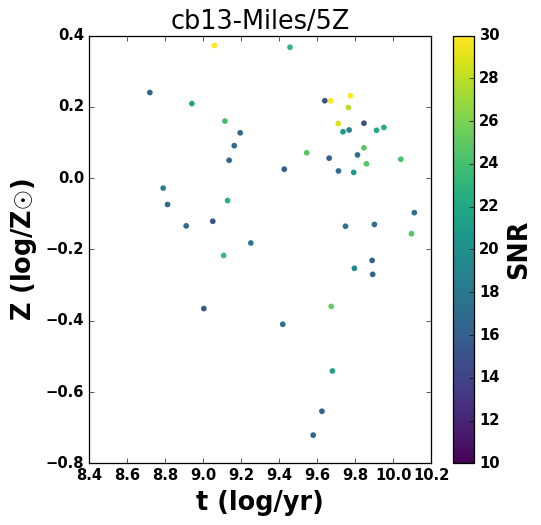

In [66]:
mask = snr>15
table = bc03_step1_4Z[mask]
table = cb13_step2_7Z[mask]
table = cb13_step2_5Z[mask]

scatter(table["log_t_L_mod"], table["log_Z_L_mod"], c=snr[mask], lw=0, vmin=10, vmax=30, cmap=cm.viridis)
cb = colorbar()

xlim(8.4, 10.2)
ylim(-0.8, 0.4)

title("cb13-Miles/5Z")
xlabel(r"t (log/yr)")
ylabel(r"Z (log/Z$\odot$)")
cb.set_label("SNR")

('dynbasfit_processed_SPEC_spSpec-51614-0281-603.log', 3, 34740000000.0, 9.113, 9.059, 0.372, 0.372, 0.392, 98.7, 1.381)


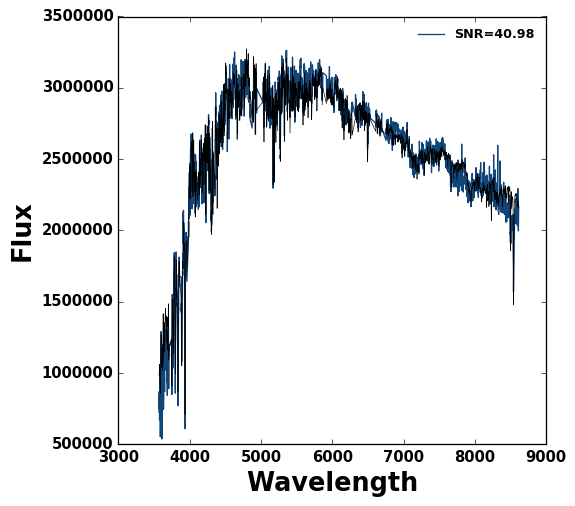

In [63]:
idir = os.path.expandvars("$master/notebooks/data/AgeGridResampling/")

mask = (table["log_Z_L_mod"]>0.2)&(table["log_t_L_mod"]<9.2)&(snr>28)
i = 0

print table[mask][i]

file = table["input_file"][mask][i]
wl, fl, sg, md = loadtxt(idir+"bc03_step2/"+file.replace(".fit", ".log"), usecols=(0,1,2,5), unpack=True)

plot(wl[fl>0], fl[fl>0], "-", lw=1, label="SNR={:.2f}".format(snr[mask][i]))
plot(wl[fl>0], md[fl>0], "-k", lw=0.5)
legend(loc=0, fontsize=10)

xlim(3000, 9000)

xlabel("Wavelength")
ylabel("Flux")